# Assignment 1

Juan Lopez Martin

jl5522@columbia.edu

In [1]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('fire_nrt_V1_96617.csv')

In [3]:
data.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
0,-42.69706,147.70634,333.6,0.57,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.4,4.0,D
1,-42.26889,147.31104,336.2,0.39,0.44,2019-10-01,336,N,VIIRS,n,1.0NRT,296.9,3.9,D
2,-40.85202,145.38068,327.9,0.46,0.47,2019-10-01,336,N,VIIRS,n,1.0NRT,295.3,3.7,D
3,-42.39329,147.47144,346.9,0.38,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,294.2,6.2,D
4,-42.69701,147.70584,334.1,0.56,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.5,4.1,D


In [4]:
data.confidence.value_counts()

n    771035
h    108407
l     76815
Name: confidence, dtype: int64

## Task 1: Density Plots

### Task 1.1

Note that I included an image of Astrulia, removing the axes of latitude and longitude as they do not provide much information once the map is shown.

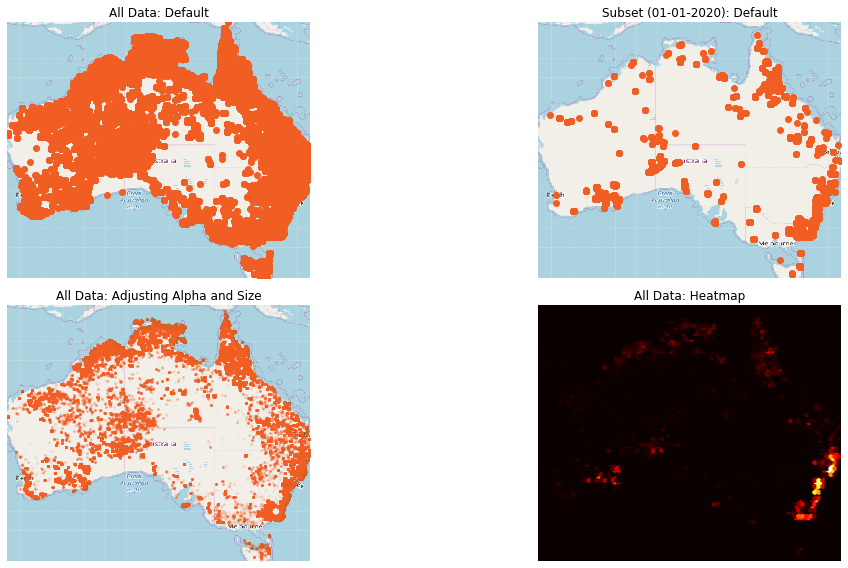

In [165]:
%matplotlib inline

# Load image of map of Australia
ausmap = plt.imread('australia.png')

# Config Subplot
fig, ax = plt.subplots(2, 2, figsize = (18,8))

# All data plot
ax[0,0].scatter(data.longitude, data.latitude, c = '#F05E23')
ax[0,0].set_title('All Data: Default')
ax[0,0].set_xlim(data.longitude.min(),   data.longitude.max())
ax[0,0].set_ylim(data.latitude.min(), data.latitude.max())
ax[0,0].imshow(ausmap, aspect= 'equal', extent = ((data.longitude.min(),   data.longitude.max(),
                                                   data.latitude.min(), data.latitude.max())))
ax[0,0].axis('off')

# Subset plot
data_sub = data[data.acq_date=='2020-01-01']
ax[0,1].scatter(data_sub.longitude, data_sub.latitude, c = '#F05E23')
ax[0,1].set_title('Subset (01-01-2020): Default')
ax[0,1].set_xlim(data.longitude.min(),   data.longitude.max())
ax[0,1].set_ylim(data.latitude.min(), data.latitude.max())
ax[0,1].imshow(ausmap, aspect= 'equal', extent = ((data.longitude.min(),   data.longitude.max(),
                                                   data.latitude.min(), data.latitude.max())))
ax[0,1].axis('off')

# Tweaked all data plot
ax[1,0].scatter(data.longitude, data.latitude, c = '#F05E23', alpha = 0.05, s = 3)
ax[1,0].set_title('All Data: Adjusting Alpha and Size')
ax[1,0].set_xlim(data.longitude.min(),   data.longitude.max())
ax[1,0].set_ylim(data.latitude.min(), data.latitude.max())
ax[1,0].imshow(ausmap, aspect= 'equal', extent = ((data.longitude.min(),   data.longitude.max(),
                                                   data.latitude.min(), data.latitude.max())))
ax[1,0].axis('off')

# Hexbin plot
ax[1,1].hexbin(data.longitude, data.latitude, gridsize = 75, cmap = 'hot', mincnt = 0)
ax[1,1].set_title('All Data: Heatmap')
ax[1,1].set_xlim(data.longitude.min(),   data.longitude.max())
ax[1,1].set_ylim(data.latitude.min(), data.latitude.max())
ax[1,1].imshow(ausmap, aspect= 'equal', extent = ((data.longitude.min(),   data.longitude.max(),
                                                   data.latitude.min(), data.latitude.max())))
ax[1,1].axis('off')

plt.tight_layout()

### Task 1.2

From the plot that adjusts alpha and size and more clearly from the heatmap, we see that the more clear anomalies are concentrated in the south-east region. However, there are also important anomalies in the south-west part and in some regions in the north.

## Task 2: Visualizing Class Membership

### Task 2.1

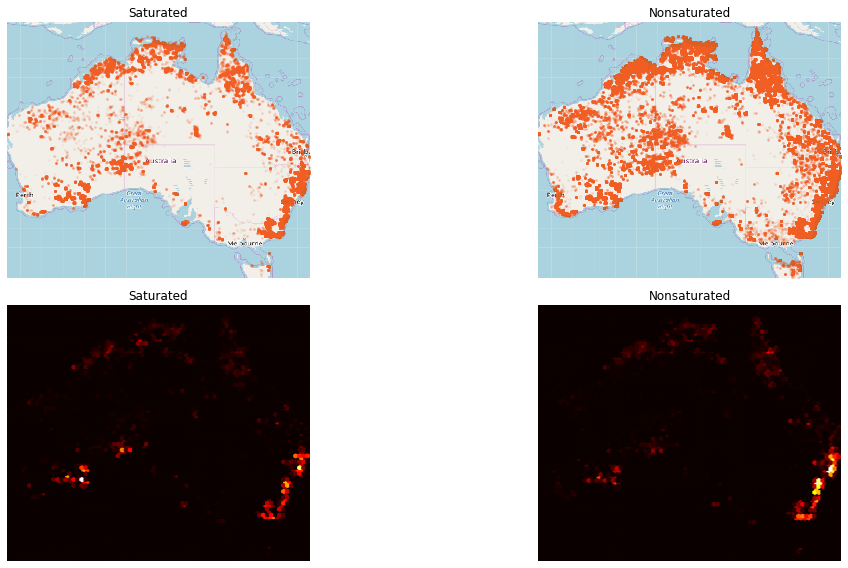

In [163]:
# Config Subplot
fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize = (18,8))

# All data plot
data_sat = data[data.confidence=='h']
ax[0,0].scatter(data_sat.longitude, data_sat.latitude, c = '#F05E23', alpha = 0.05, s = 3)
ax[0,0].set_title('Saturated')
ax[0,0].set_xlim(data.longitude.min(),   data.longitude.max())
ax[0,0].set_ylim(data.latitude.min(), data.latitude.max())
ax[0,0].imshow(ausmap, aspect= 'equal', extent = ((data.longitude.min(),   data.longitude.max(),
                                                   data.latitude.min(), data.latitude.max())))
ax[0,0].axis('off')

# Subset plot
data_nonsat = data[data.confidence!='h']
ax[0,1].scatter(data_nonsat.longitude, data_nonsat.latitude, c = '#F05E23', alpha = 0.05, s = 3)
ax[0,1].set_title('Nonsaturated')
ax[0,1].set_xlim(data.longitude.min(),   data.longitude.max())
ax[0,1].set_ylim(data.latitude.min(), data.latitude.max())
ax[0,1].imshow(ausmap, aspect= 'equal', extent = ((data.longitude.min(),   data.longitude.max(),
                                                   data.latitude.min(), data.latitude.max())))
ax[0,1].axis('off')

# All data plot
data_sat = data[data.confidence=='h']
ax[1,0].hexbin(data_sat.longitude, data_sat.latitude, gridsize = 75, cmap = 'hot', mincnt = 0)
ax[1,0].set_title('Saturated')
ax[1,0].set_xlim(data.longitude.min(),   data.longitude.max())
ax[1,0].set_ylim(data.latitude.min(), data.latitude.max())
ax[1,0].imshow(ausmap, aspect= 'equal', extent = ((data.longitude.min(),   data.longitude.max(),
                                                   data.latitude.min(), data.latitude.max())))
ax[1,0].axis('off')

# Subset plot
data_nonsat = data[data.confidence!='h']
ax[1,1].hexbin(data_nonsat.longitude, data_nonsat.latitude, gridsize = 75, cmap = 'hot', mincnt = 0)
ax[1,1].set_title('Nonsaturated')
ax[1,1].set_xlim(data.longitude.min(),   data.longitude.max())
ax[1,1].set_ylim(data.latitude.min(), data.latitude.max())
ax[1,1].imshow(ausmap, aspect= 'equal', extent = ((data.longitude.min(),   data.longitude.max(),
                                                   data.latitude.min(), data.latitude.max())))
ax[1,1].axis('off')

plt.tight_layout()

I picked both the adjusted alpha and size approach but also the heatmap, which I think combined provide a clearer view of the detected activity. It is clear that the nonsaturated pixels are much more frequent. This is expected, given that in many cases they will reflect artifacts and not actual fires. However, saturated pixels are also more prevalent than I originally expected, reflecting fire activities that do not appear very likely (for instance, in the Great Victoria Desert region).

### Task 2.2

This visualization is more clear in conveying that saturated regions are less frequent, being often at the core of a more diffusse set of nonsaturated areas. Changing the order of the two classes obscured this result, as it hid almost all the saturated regions from the much more prevalent nonsaturated ones. Therefore, I excluded the plot from the final version of this notebook.

(113.44701, 153.45218, -43.21232, -9.3965)

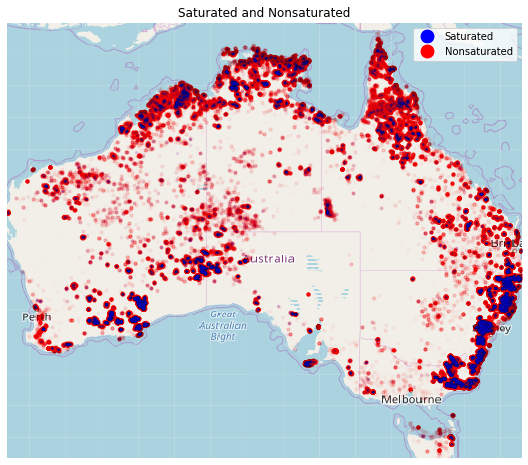

In [162]:
# Config Subplot
fig, ax = plt.subplots(figsize = (18,8))

# All data plot
data_sat = data[data.confidence=='h']
data_nonsat = data[data.confidence!='h']

ax.scatter(data_nonsat.longitude, data_nonsat.latitude, c = 'red', alpha = 0.01, s = 10)
ax.scatter(data_sat.longitude, data_sat.latitude, c = 'blue', alpha = 0.01, s = 3)

ax.set_title('Saturated and Nonsaturated')
ax.set_xlim(data.longitude.min(),   data.longitude.max())
ax.set_ylim(data.latitude.min(), data.latitude.max())
ax.imshow(ausmap, aspect= 'equal', extent = (data.longitude.min(),   data.longitude.max(),
                                                   data.latitude.min(), data.latitude.max()))

legend_elements = [Line2D([0], [0], marker='o', color='w', label='Saturated',
                          markerfacecolor='blue', markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='Nonsaturated',
                          markerfacecolor='red', markersize=15)]
                   
ax.legend(handles=legend_elements)

ax.axis('off')

### Task 2.3

Plotting all the points in one plot is a bit misleading, given each point occurs in a certain timeframe. Therefore, my final plot explores how saturated and nonsaturated regions evolve over time. This can be used to better understand how these signals really relate to the presence of fire. For instance, the activity on the south-east region is very prevalent since December 2019. In contrast, there are areas in which the signal is only captured in one specific day, either showing there is some type of artifact or a relatively small fire or other light-inducing phenomena. The video is obviously not available if this is viewed as a PDF or on GitHub.

In [6]:
from matplotlib import animation, rc
from IPython.display import HTML

In [135]:
%%capture
fig, ax = plt.subplots(ncols=2, figsize = (14,10))

ax[0].set_title('Saturated')
ax[0].set_xlim(data.longitude.min(),   data.longitude.max())
ax[0].set_ylim(data.latitude.min(), data.latitude.max())
ax[0].imshow(ausmap, aspect= 'equal', extent = ((data.longitude.min(),   data.longitude.max(),
                                                   data.latitude.min(), data.latitude.max())))
ax[0].axis('off')

ax[1].set_title('Nonsaturated')
ax[1].set_xlim(data.longitude.min(),   data.longitude.max())
ax[1].set_ylim(data.latitude.min(), data.latitude.max())
ax[1].imshow(ausmap, aspect= 'equal', extent = ((data.longitude.min(),   data.longitude.max(),
                                                   data.latitude.min(), data.latitude.max())))
ax[1].axis('off')

fire1 = ax[0].scatter([], [], c = '#F05E23', alpha = 0.1, s = 8)
fire2 = ax[1].scatter([], [], c = '#F05E23', alpha = 0.1, s = 8)
date_to_plot1 = ax[0].text(117, -12, "", fontsize = 16)
date_to_plot2 = ax[0].text(117, -12, "", fontsize = 16)

dates = data.acq_date.unique()

def animate(i):
    newdata_sat = data_sat = data[(data.confidence=='h') & (data.acq_date==dates[i])]
    newdata_nonsat = data_sat = data[(data.confidence!='h') & (data.acq_date==dates[i])]        
        
    fire1.set_offsets(np.c_[newdata_sat.longitude, newdata_sat.latitude])
    date_to_plot1.set_text(str(dates[i]))
    
    fire2.set_offsets(np.c_[newdata_nonsat.longitude, newdata_nonsat.latitude])
    date_to_plot2.set_text(str(dates[i]))

    
#ani = animation.FuncAnimation(fig, animate, interval=300, repeat=False)

In [136]:
#HTML(ani.to_html5_video())

Plot 2

In [131]:
%%capture
fig, ax = plt.subplots(figsize = (10,8))

ax.set_title('Saturated and Nonsaturated')
ax.set_xlim(data.longitude.min(),   data.longitude.max())
ax.set_ylim(data.latitude.min(), data.latitude.max())
ax.imshow(ausmap, aspect= 'equal', extent = ((data.longitude.min(),   data.longitude.max(),
                                                   data.latitude.min(), data.latitude.max())))
ax.axis('off')

legend_elements = [Line2D([0], [0], marker='o', color='w', label='Saturated',
                          markerfacecolor='blue', markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='Nonsaturated',
                          markerfacecolor='red', markersize=15)]
                   
ax.legend(handles=legend_elements)

fire2 = ax.scatter([], [], c = 'red', alpha = 0.1, s = 8)
fire1 = ax.scatter([], [], c = 'blue', alpha = 0.1, s = 8)
date_to_plot1 = ax.text(117, -12, "", fontsize = 16)

dates = data.acq_date.unique()

def animate(i):
    newdata_sat = data_sat = data[(data.confidence=='h') & (data.acq_date==dates[i])]
    newdata_nonsat = data_sat = data[(data.confidence!='h') & (data.acq_date==dates[i])]        
        
    fire1.set_offsets(np.c_[newdata_sat.longitude, newdata_sat.latitude])
    date_to_plot1.set_text(str(dates[i]))
    fire2.set_offsets(np.c_[newdata_nonsat.longitude, newdata_nonsat.latitude])

    
#ani = animation.FuncAnimation(fig, animate, interval=300, repeat=False)

In [132]:
#HTML(ani.to_html5_video())